# Regression Analysis: Simple Linear Regression

Simple Linear Regression is a statistical method used to model the relationship between a scalar response variable and one explanatory variable by fitting a linear equation to observed data. The key idea is to find the linear relationship that best explains the variability in the dependent variable based on the variability in the independent variable.

#### Mathematical Formula and Approach

The equation of a simple linear regression line is:

$$
y = \beta_0 + \beta_1x + \epsilon
$$

where:
- $y$ is the dependent variable (response),
- $x$ is the independent variable (predictor),
- $\beta_0$ is the intercept of the regression line,
- $\beta_1$ is the slope of the regression line,
- $\epsilon$ is the error term.

#### Steps for Conducting Simple Linear Regression

1. **Choose Variables:** Identify the dependent variable ($y$) and the independent variable ($x$).
2. **Estimate Coefficients:** Use the Least Squares method to estimate the coefficients $\beta_0$ and $\beta_1$ that minimize the sum of squared residuals.
3. **Fit the Model:** Use the estimated coefficients to fit the model to the data.
4. **Assess the Model:** Evaluate the model's performance using $R^2$, residual analysis, and other diagnostic measures.

#### Assumptions

- **Linearity:** There is a linear relationship between $x$ and $y$.
- **Independence:** Observations are independent of each other.
- **Homoscedasticity:** The residuals (differences between observed and predicted values) have constant variance.
- **Normality:** The residuals are normally distributed.

#### Business Scenario: Optimization of Autonomous Driving Systems

#### Scenario Description

An automotive company is utilizing its dataset from autonomous vehicle tests to determine factors that contribute to driving performance and safety.

#### Business Problem

The company aims to use Simple Linear Regression to investigate how various factors like `average_speed`, `acceleration_variance`, and `braking_intensity` predict the `safety_score`.

#### Generating Relevant Data

The provided code simulates a dataset for autonomous vehicle performance with factors that could affect `safety_score`.

#### Initial Analysis: Simple Linear Regression

The company begins by exploring the impact of `braking_intensity` on `safety_score`:

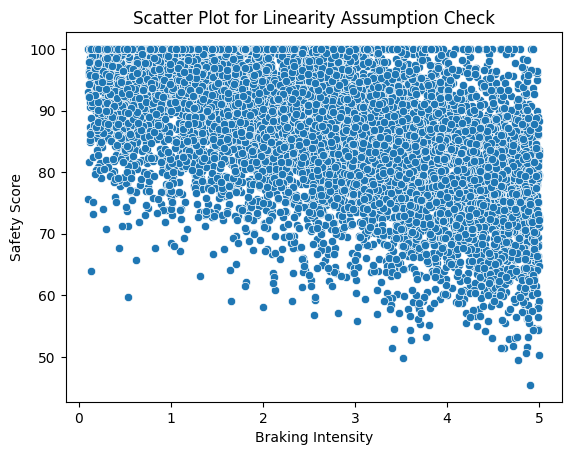

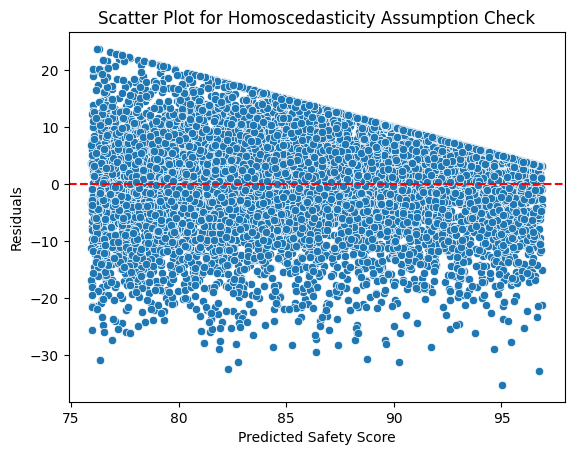

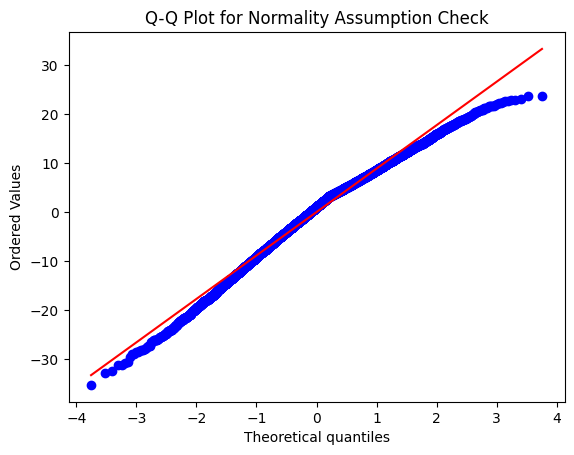

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.stattools import durbin_watson
import scipy.stats as stats

np.random.seed(42)

# Sample size
n_samples = 8000

# Generate synthetic dataset
df_autonomous = pd.DataFrame({
    'trip_id': np.arange(1, n_samples + 1),
    'average_speed': np.random.uniform(30, 120, n_samples),  # Speed in km/h
    'acceleration_variance': np.random.uniform(0.1, 5, n_samples),  # Variance in acceleration
    'braking_intensity': np.random.uniform(0.1, 5, n_samples),  # Intensity of braking events
    'weather_condition': np.random.choice(['Sunny', 'Rainy', 'Snowy'], n_samples, p=[0.6, 0.3, 0.1]),
    'traffic_density': np.random.choice(['Low', 'Medium', 'High'], n_samples, p=[0.3, 0.4, 0.3]),
    'obstacle_frequency': np.random.poisson(2, n_samples),  # Obstacles per kilometer
    'lane_changes': np.random.poisson(1, n_samples),  # Number of lane changes
    'fuel_efficiency': np.random.uniform(5, 15, n_samples),  # km/l
})

# Assume a negative relationship between braking intensity and safety score and some random noise
df_autonomous['safety_score'] = 100 - (df_autonomous['braking_intensity'] * 5 +
                                       np.random.normal(0, 10, n_samples))
df_autonomous['safety_score'] = df_autonomous['safety_score'].clip(0, 100)

# Check the assumptions for linear regression
# Check for Linearity assumption with a scatter plot

sns.scatterplot(x='braking_intensity', y='safety_score', data=df_autonomous)
plt.title('Scatter Plot for Linearity Assumption Check')
plt.xlabel('Braking Intensity')
plt.ylabel('Safety Score')
plt.show()

# Check for Homoscedasticity assumption with a scatter plot
# Plot residuals after fitting a simple linear regression

# Fit the linear regression model
X = df_autonomous[['braking_intensity']]
y = df_autonomous['safety_score']
model = LinearRegression()
model.fit(X, y)

# Predict the values and calculate residuals
y_pred = model.predict(X)
residuals = y - y_pred

sns.scatterplot(x=y_pred, y=residuals)
plt.title('Scatter Plot for Homoscedasticity Assumption Check')
plt.xlabel('Predicted Safety Score')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Check the Independence assumption with Durbin-Watson statistic
durbin_watson(residuals)

# Check for Normality of residuals with a Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for Normality Assumption Check')
plt.show()

Based on the generated plots:

1. **Scatter Plot for Linearity Assumption Check:** The relationship between braking_intensity and safety_score appears to be linearly decreasing, which suggests that the linearity assumption for Pearson's correlation is satisfied. However, since we are moving forward with a simple linear regression analysis, this linearity is also relevant and appears to be valid.

2. **Scatter Plot for Homoscedasticity Assumption Check:** The scatter plot of residuals does not show a pattern or funnel shape, which would indicate heteroscedasticity. The residuals are relatively evenly spread across the range of predicted safety scores, which suggests that the homoscedasticity assumption is reasonable.

3. **Durbin-Watson Statistic:** The value is not displayed here, but typically, a Durbin-Watson statistic close to 2.0 suggests that there is no autocorrelation in the residuals, which would meet the independence assumption.

4. Q-Q Plot for Normality Assumption Check:** The Q-Q plot shows that the residuals mostly fall along the straight line, which indicates that the normality assumption is not violated. Some deviation from normality is seen at the extremes, but this is common in practice and may not significantly affect the regression analysis.

#### Proceed with the Simple Linear Regression Analysis

In [4]:
from sklearn.linear_model import LinearRegression

# Initializing the model
linear_model = LinearRegression()

# Fitting the model
linear_model.fit(df_autonomous[['braking_intensity']], df_autonomous['safety_score'])

# Getting the slope (coefficient) and intercept
slope = linear_model.coef_[0]
intercept = linear_model.intercept_

# Determining the score of the model (R-squared)
r_squared = linear_model.score(df_autonomous[['braking_intensity']], df_autonomous['safety_score'])

slope, intercept, r_squared

(-4.275074502317728, 97.31026086711863, 0.3138146911222881)

#### Interpretation of Regression Results
Given the slope (coefficient), intercept, and R-squared value obtained from fitting the model:

- The slope indicates the average decrease in safety_score associated with a one-unit increase in braking_intensity. If the slope is negative, it suggests that as braking_intensity increases, the safety_score tends to decrease, which is consistent with the expectation that more intense braking might be indicative of less safe driving conditions or behaviors.

- The intercept is the predicted safety_score when braking_intensity is zero. It represents the baseline safety score for the trips in the dataset.

- The R-squared value reflects the proportion of the variance in safety_score that is predictable from braking_intensity. A higher R-squared value would indicate a stronger relationship between braking_intensity and safety_score.

#### Conclusion for Automotive Scenario
If the regression model shows a significant negative slope and a substantial R-squared value, the automotive company can conclude that braking intensity is a crucial factor affecting the safety of autonomous vehicles. The insights from this regression analysis could be used to refine the autonomous driving algorithms, particularly to optimize the braking system for enhanced safety performance.